# CS-C3250 - Data Science Project: Predicting Housing Prices in One Year
__Sponsored by OP bank__

## Exploratory Data Analysis

Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import rpy2
import pgeocode

from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer

Reading the data.

In [2]:
df = pd.read_csv("quarterly_data.csv", encoding = 'unicode_escape')
df

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",5458,5347,5826,5566,5545,5812,5909,5856,...,7755,8332,8130,8068,7802,8543,9170,7517,8872,8596
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",5164,5021,5081,5006,5713,5866,5552,5614,...,6914,7694,6901,7435,7573,7398,7868,7700,7829,7974
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",4944,5396,4828,5394,5571,5709,5450,5010,...,6883,6846,7379,6728,7205,6678,7178,7405,8053,8174
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,5168,5219,5181,5269,5632,5807,5630,5511,...,7043,7478,7476,7345,7460,7275,8058,7540,8188,8188
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, two-room flat",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10070,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, three-room flat+",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10071,99980 Utsjoki Keskus (Utsjoki ),Blocks of flats total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10072,99980 Utsjoki Keskus (Utsjoki ),Terraced houses total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Transform location description to only postal code

In [3]:
codes = df.iloc[:,0].apply(lambda x: x[:5])

Getting indicies and column names

In [4]:
indices = pd.MultiIndex.from_arrays((codes, df.iloc[:,1]))
columns = df.iloc[:,2:].columns
df1 = pd.DataFrame(df.iloc[:,2:].to_numpy(), index=indices, columns=columns)

Force cell values to numeric type, in the process turning non-numeric cells (e.g. "..") to NaN values.

In [5]:
df1 = df1.apply(pd.to_numeric, errors="coerce", downcast="integer")
df1.head()

2010Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5458.0   
            Blocks of flats, two-room flat                                     5164.0   
            Blocks of flats, three-room flat+                                  4944.0   
            Blocks of flats total                                              5168.0   
            Terraced houses total                                                 NaN   

                                               2010Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5347.0   
            Blocks of flats, two-room flat                                     5021.0   
            Blocks of flats, three-room flat+                                  5396.0   
            Blocks of flats total                                              5219.0   
            Terraced houses total                                                 NaN   

                                               2010Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5826.0   
            Blocks of flats, two-room flat                                     5081.0   
            Blocks of flats, three-room flat+                                  4828.0   
            Blocks of flats total                                              5181.0   
            Terraced houses total                                                 NaN   

                                               2010Q4 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5566.0   
            Blocks of flats, two-room flat                                     5006.0   
            Blocks of flats, three-room flat+                                  5394.0   
            Blocks of flats total                                              5269.0   
            Terraced houses total                                                 NaN   

                                               2011Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5545.0   
            Blocks of flats, two-room flat                                     5713.0   
            Blocks of flats, three-room flat+                                  5571.0   
            Blocks of flats total                                              5632.0   
            Terraced houses total                                                 NaN   

                                               2011Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5812.0   
            Blocks of flats, two-room flat                                     5866.0   
            Blocks of flats, three-room flat+                                  5709.0   
            Blocks of flats total                                              5807.0   
            Terraced houses total                                                 NaN   

                                               2011Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5909.0   
            Blocks of flats, two-roo

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10074 entries, ('00100', 'Blocks of flats, one-room flat') to ('99980', 'Building types total')
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2010Q1 Price per square meter (EUR/m2)   1608 non-null   float64
 1   2010Q2 Price per square meter (EUR/m2)   1703 non-null   float64
 2   2010Q3 Price per square meter (EUR/m2)   1637 non-null   float64
 3   2010Q4 Price per square meter (EUR/m2)   1604 non-null   float64
 4   2011Q1 Price per square meter (EUR/m2)   1645 non-null   float64
 5   2011Q2 Price per square meter (EUR/m2)   1691 non-null   float64
 6   2011Q3 Price per square meter (EUR/m2)   1673 non-null   float64
 7   2011Q4 Price per square meter (EUR/m2)   1398 non-null   float64
 8   2012Q1 Price per square meter (EUR/m2)   1557 non-null   float64
 9   2012Q2 Price per square meter (EUR/m2)   1686 

Transposing the data for other needs.

In [7]:
dfT = df1.T
dfT.head()

Postal code                                                     00100  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5458.0   
2010Q2 Price per square meter (EUR/m2)                         5347.0   
2010Q3 Price per square meter (EUR/m2)                         5826.0   
2010Q4 Price per square meter (EUR/m2)                         5566.0   
2011Q1 Price per square meter (EUR/m2)                         5545.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5164.0   
2010Q2 Price per square meter (EUR/m2)                         5021.0   
2010Q3 Price per square meter (EUR/m2)                         5081.0   
2010Q4 Price per square meter (EUR/m2)                         5006.0   
2011Q1 Price per square meter (EUR/m2)                         5713.0   

Postal code                                                               \
Building type                          Blocks of flats, three-room flat+   
2010Q1 Price per square meter (EUR/m2)                            4944.0   
2010Q2 Price per square meter (EUR/m2)                            5396.0   
2010Q3 Price per square meter (EUR/m2)                            4828.0   
2010Q4 Price per square meter (EUR/m2)                            5394.0   
2011Q1 Price per square meter (EUR/m2)                            5571.0   

Postal code                                                   \
Building type                          Blocks of flats total   
2010Q1 Price per square meter (EUR/m2)                5168.0   
2010Q2 Price per square meter (EUR/m2)                5219.0   
2010Q3 Price per square meter (EUR/m2)                5181.0   
2010Q4 Price per square meter (EUR/m2)                5269.0   
2011Q1 Price per square meter (EUR/m2)                5632.0   

Postal code                                                   \
Building type                          Terraced houses total   
2010Q1 Price per square meter (EUR/m2)                   NaN   
2010Q2 Price per square meter (EUR/m2)                   NaN   
2010Q3 Price per square meter (EUR/m2)                   NaN   
2010Q4 Price per square meter (EUR/m2)                   NaN   
2011Q1 Price per square meter (EUR/m2)                   NaN   

Postal code                                                  \
Building type                          Building types total   
2010Q1 Price per square meter (EUR/m2)               5168.0   
2010Q2 Price per square meter (EUR/m2)               5219.0   
2010Q3 Price per square meter (EUR/m2)               5181.0   
2010Q4 Price per square meter (EUR/m2)               5269.0   
2011Q1 Price per square meter (EUR/m2)               5632.0   

Postal code                                                     00120  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5515.0   
2010Q2 Price per square meter (EUR/m2)                         5646.0   
2010Q3 Price per square meter (EUR/m2)                         5395.0   
2010Q4 Price per square meter (EUR/m2)                         5613.0   
2011Q1 Price per square meter (EUR/m2)                         5905.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5349.0   
2010Q2 Price per square meter (EUR/m2)                         5355.0   
2010Q3 Price per square meter (EUR/m2)                         5534.0   
2010Q4 Price per square meter (EUR/m2)                         5321.0   
2011Q1 Price per square meter (EUR/m2)                         5528.0   

Postal code                                                               \
Bui

Example analysis: examine the number of NaNs in 'Terraced houses total' category

In [8]:
df1.swaplevel().T["Terraced houses total"].iloc[:,:30].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2010Q1 Price per square meter (EUR/m2) to 2021Q2* Price per square meter (EUR/m2)
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   00100   0 non-null      float64
 1   00120   0 non-null      float64
 2   00130   0 non-null      float64
 3   00140   0 non-null      float64
 4   00150   0 non-null      float64
 5   00160   0 non-null      float64
 6   00170   0 non-null      float64
 7   00180   0 non-null      float64
 8   00190   0 non-null      float64
 9   00200   1 non-null      float64
 10  00210   0 non-null      float64
 11  00220   0 non-null      float64
 12  00240   0 non-null      float64
 13  00250   0 non-null      float64
 14  00260   0 non-null      float64
 15  00270   0 non-null      float64
 16  00280   0 non-null      float64
 17  00290   0 non-null      float64
 18  00300   0 non-null      float64
 19  00310   0 non-null      float64
 20  00320   0

Plotting!

<AxesSubplot:>

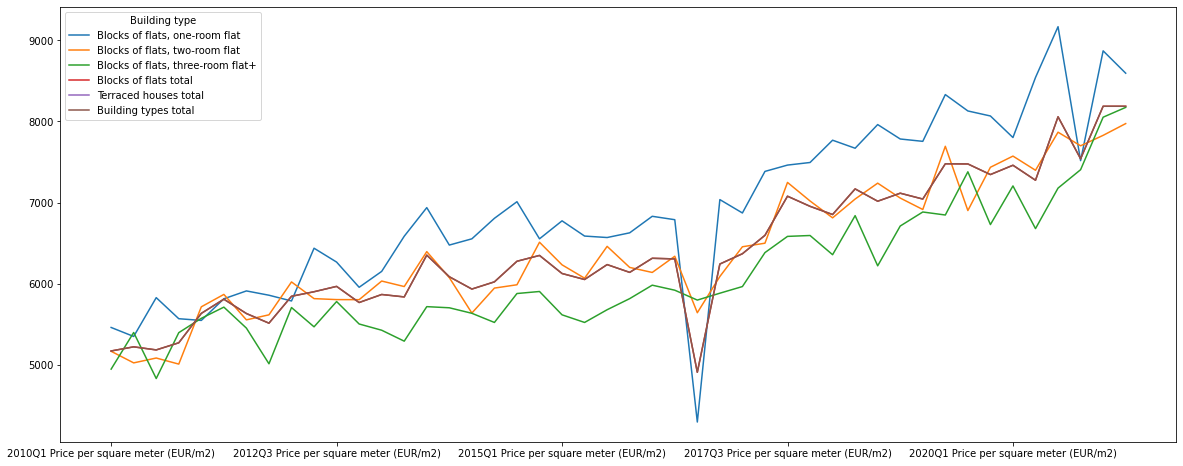

In [9]:
dfT["00100"].plot(figsize=(20,8))

# Missing data analysis

Replace `housing_type` with the type of housing in question

In [10]:
housing_types = dfT['00100'].columns
housing_types

Index(['Blocks of flats, one-room flat', 'Blocks of flats, two-room flat',
       'Blocks of flats, three-room flat+', 'Blocks of flats total',
       'Terraced houses total', 'Building types total'],
      dtype='object', name='Building type')

In [11]:
housing_type = 'Blocks of flats total'
df2 = df1.swaplevel().T[housing_type]
df2.head()

Postal code,00100,00120,00130,00140,00150,00160,00170,00180,00190,00200,...,99620,99660,99690,99710,99800,99830,99870,99930,99950,99980
2010Q1 Price per square meter (EUR/m2),5168.0,5618.0,5231.0,5766.0,5356.0,5553.0,5152.0,4828.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q2 Price per square meter (EUR/m2),5219.0,5495.0,5477.0,5950.0,5461.0,5248.0,5324.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q3 Price per square meter (EUR/m2),5181.0,5595.0,NaN,6123.0,5286.0,5278.0,5478.0,5298.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q4 Price per square meter (EUR/m2),5269.0,5521.0,5299.0,5521.0,5374.0,5293.0,5668.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q1 Price per square meter (EUR/m2),5632.0,5689.0,6294.0,6251.0,5738.0,5322.0,5701.0,5510.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution of missing values:

In [12]:
nan_df = pd.DataFrame(df2.isna().sum(), columns=["Number of NANs"])
nan_df.head()

,Number of NANs
Postal code,
00100,0
00120,9
00130,8
00140,4
00150,8


array([[<AxesSubplot:title={'center':'Number of NANs'}>]], dtype=object)

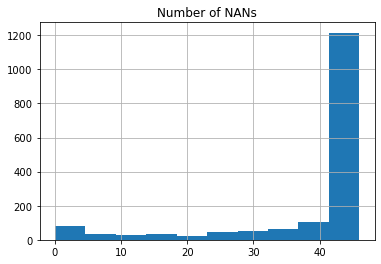

In [13]:
nan_df.hist()

In [14]:
locations = pd.read_csv("locations.csv")
locations.head()

,Unnamed: 0,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,0,100,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1714,24.9316,6.0
1,1,120,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1632,24.9391,6.0
2,2,130,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1645,24.9487,6.0
3,3,140,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1578,24.9525,6.0
4,4,150,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1570,24.9369,6.0


In [15]:
locations.sort_values(by=['postal_code'], inplace=True)
nan_df.sort_index(inplace=True)

print(locations[['postal_code']].tail())
print(nan_df.tail())
print(locations.shape)
print(nan_df.shape)

      postal_code
1674        99830
1675        99870
1676        99930
1677        99950
1678        99980
             Number of NANs
Postal code                
99830                    46
99870                    46
99930                    46
99950                    46
99980                    46
(1679, 13)
(1679, 1)


In [16]:
nan_df.reset_index(inplace=True)
nan_df["latitude"] = locations["latitude"]
nan_df['longitude'] = locations['longitude']
nan_df.head()

,Postal code,Number of NANs,latitude,longitude
0,00100,0,60.1714,24.9316
1,00120,9,60.1632,24.9391
2,00130,8,60.1645,24.9487
3,00140,4,60.1578,24.9525
4,00150,8,60.1570,24.9369


No handles with labels found to put in legend.


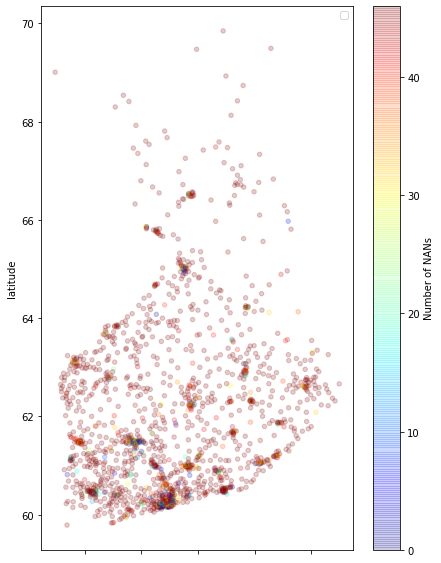

In [17]:
nan_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(7,10),
 c="Number of NANs", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.savefig('nice.pdf')

# Imputing

Let's try imputing some data

In [18]:
df2.columns[df2.isna().sum()/46 == 0]

Index(['00100', '00260', '00360', '00500', '00520', '00730', '00820', '01280',
       '01300', '01450', '02200', '02210', '02320', '02400', '02760', '03100',
       '04410', '06100', '20100', '20320', '20540', '20780', '20810', '21200',
       '23500', '24100', '26100', '33200', '33560', '33580', '33710', '33820',
       '33850', '33960', '36200', '37120', '40520'],
      dtype='object', name='Postal code')

In [19]:
df3 = df2[df2.columns[df2.isna().sum()/46 == 0]]
df3.head()

Postal code,00100,00260,00360,00500,00520,00730,00820,01280,01300,01450,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
2010Q1 Price per square meter (EUR/m2),5168.0,4873.0,2756.0,4058.0,3317.0,3006.0,2652.0,2098.0,2616.0,1809.0,...,2827.0,1951.0,2152.0,1760.0,1859.0,1227.0,1897.0,1747.0,1613.0,1968.0
2010Q2 Price per square meter (EUR/m2),5219.0,5086.0,3051.0,4111.0,3706.0,3070.0,2561.0,2045.0,2688.0,2063.0,...,3094.0,1816.0,2039.0,1803.0,1970.0,1254.0,2026.0,1659.0,1542.0,2110.0
2010Q3 Price per square meter (EUR/m2),5181.0,4939.0,2889.0,4247.0,3672.0,2944.0,2632.0,2210.0,2814.0,2080.0,...,3001.0,2081.0,1978.0,1851.0,1916.0,1338.0,1700.0,1851.0,1582.0,2096.0
2010Q4 Price per square meter (EUR/m2),5269.0,4906.0,3037.0,4226.0,3681.0,3046.0,2580.0,2359.0,2727.0,2052.0,...,2990.0,1963.0,2102.0,1740.0,1980.0,1287.0,1881.0,1715.0,1745.0,2180.0
2011Q1 Price per square meter (EUR/m2),5632.0,5272.0,3188.0,4342.0,3654.0,3061.0,2793.0,2165.0,2734.0,2200.0,...,3122.0,2142.0,2181.0,1838.0,1851.0,1398.0,1847.0,1836.0,1660.0,2116.0


In [20]:
na_pct = 0.4

df_masked = df3.mask(np.random.rand(*(df3.shape)) >= 1 - na_pct)
df_masked.head()

Postal code,00100,00260,00360,00500,00520,00730,00820,01280,01300,01450,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
2010Q1 Price per square meter (EUR/m2),NaN,4873.0,2756.0,4058.0,NaN,3006.0,2652.0,NaN,2616.0,NaN,...,NaN,1951.0,2152.0,NaN,NaN,NaN,1897.0,1747.0,NaN,1968.0
2010Q2 Price per square meter (EUR/m2),NaN,5086.0,3051.0,NaN,NaN,NaN,NaN,2045.0,2688.0,2063.0,...,3094.0,1816.0,2039.0,1803.0,NaN,NaN,NaN,NaN,1542.0,2110.0
2010Q3 Price per square meter (EUR/m2),5181.0,4939.0,2889.0,4247.0,3672.0,2944.0,NaN,2210.0,NaN,2080.0,...,NaN,NaN,1978.0,NaN,1916.0,1338.0,1700.0,1851.0,NaN,2096.0
2010Q4 Price per square meter (EUR/m2),NaN,4906.0,3037.0,4226.0,NaN,3046.0,2580.0,2359.0,NaN,2052.0,...,NaN,1963.0,2102.0,NaN,NaN,1287.0,1881.0,NaN,1745.0,2180.0
2011Q1 Price per square meter (EUR/m2),5632.0,5272.0,NaN,4342.0,3654.0,3061.0,2793.0,2165.0,NaN,NaN,...,3122.0,2142.0,NaN,1838.0,1851.0,1398.0,NaN,NaN,1660.0,2116.0


In [21]:
from rpy2.robjects.packages import importr
imputeTS = importr('imputeTS') 
kalman_StructTs = robjects.r['na.kalman'] 
kalman_auto_arima = robjects.r['na.kalman']

R[write to console]: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.0.2/library/methods/libs/x64/methods.dll':
  LoadLibrary failure:  The specified procedure could not be found.



RRuntimeError: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.0.2/library/methods/libs/x64/methods.dll':
  LoadLibrary failure:  The specified procedure could not be found.


In [ ]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())